In [299]:
!pip install pandas duckdb matplotlib seaborn

import pandas as pd
import duckdb
import os
import matplotlib.pyplot as plt
import seaborn as sns

key_vendor = "Hardware Vendor\t"
key_system = "System"
key_processor = "Processor "

file_combined_path = '../spec-cint2006-2017.csv'

if os.path.exists(file_combined_path):
    df = pd.read_csv(file_combined_path)
else:
    # Load data from the first CSV file
    file1_path = '../spec-cint2006-results-20240730-120726.csv'
    if os.path.exists(file1_path):
        data1 = pd.read_csv(file1_path)
    else:
        raise FileNotFoundError(f"The file {file1_path} does not exist.")

    # Load data from the second CSV file
    file2_path = '../spec-cint2017-results-20240730-120816.csv'
    if os.path.exists(file2_path):
        data2 = pd.read_csv(file2_path)
    else:
        raise FileNotFoundError(f"The file {file2_path} does not exist.")

    # Add a column to each dataframe to label the source
    data1['Source'] = 'cint2006'
    data2['Source'] = 'cint2017'
    # 2006 columns: 'Result' 'Baseline'
    # 2017 columns: 'Result' 'Baseline'
    data1['perf'] = data1['Result']
    data2['perf'] = data2['Result'] * 9

    # Concatenate the dataframes
    df = pd.concat([data1, data2], ignore_index=True)
    df = df[df["HW Avail"].notna()]
    df["hw_avail_year"] = df["HW Avail"].str.split('-').str[1].astype(int)
    df["perf_per_chip"] = df["perf"] / df["# Chips"]
    # Filter out 0 values
    df = df[df["perf"] != 0]
    # df["baseline_per_core"] = df["Baseline"] / df["# Cores"]
    df.to_csv(file_combined_path, index=False)
    
# con = duckdb.connect("../spec.db")
# con.sql("DROP TABLE IF EXISTS spec")
# con.sql("CREATE TABLE spec AS SELECT * FROM df")
# con.close()


/var/folders/z4/3bk11y114tn3lh60qlpnzh6m0000gn/T/ipykernel_79386/2764262578.py:16: DtypeWarning: Columns (17,61,62) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_combined_path)


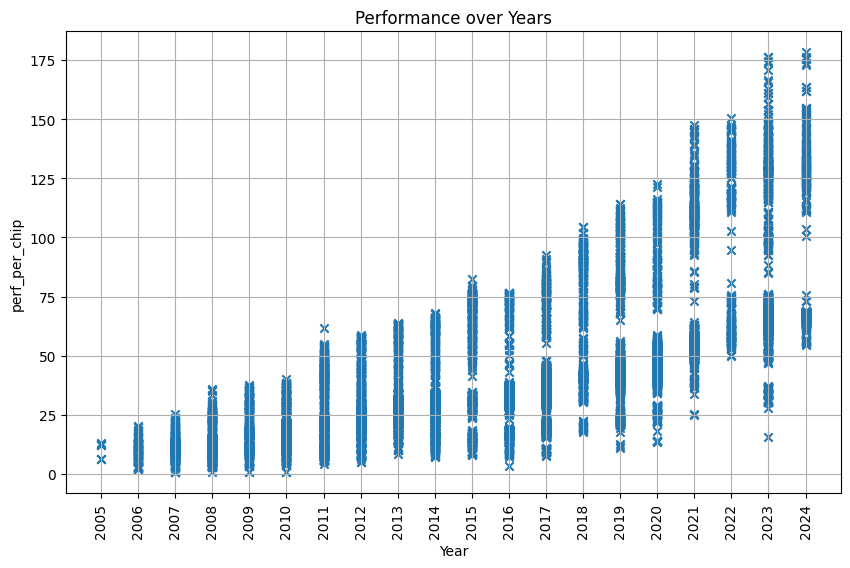

In [300]:
plt.close('all')
# display(df)
plt.figure(figsize=(10, 6))
# y_val = 'Baseline'
y_val = 'perf_per_chip'
#y_val = 'baseline_per_core'
plt.scatter(
    df['hw_avail_year'],
    df[y_val],
    marker='x')
plt.xlabel('Year')
plt.ylabel(y_val)
plt.title('Performance over Years')
plt.xticks(ticks=df['hw_avail_year'].unique(), rotation=90)
plt.grid(True)
plt.show()
plt.close()

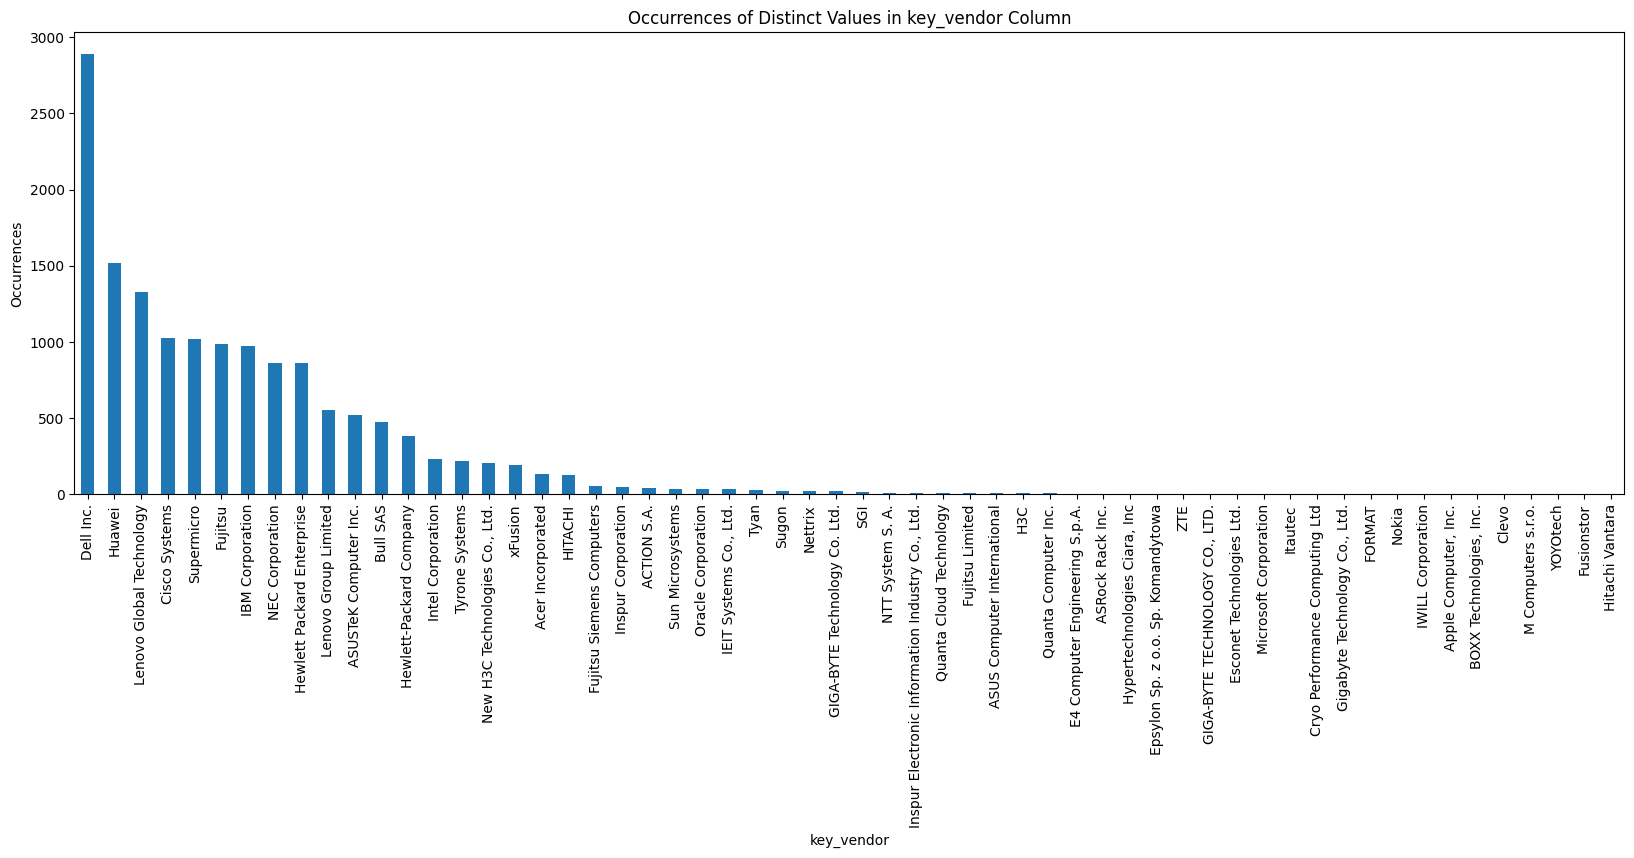

In [301]:
# Count the occurrences of each distinct value in the "key_vendor" column
value_counts = df[key_vendor].value_counts()

# Create a histogram
plt.figure(figsize=(20, 6))
value_counts.plot(kind='bar')
plt.title('Occurrences of Distinct Values in key_vendor Column')
plt.xlabel('key_vendor')
plt.ylabel('Occurrences')
plt.xticks(rotation=90)
plt.show()

In [302]:
# df = df[df[key_processor].str.contains('xeon', case=False)]
# df.to_csv("../spec-intel-xeon-cpu2006-2017.csv", header=True)

# plt.close('all')
# # display(df)
# plt.figure(figsize=(10, 6))
# # y_val = 'Baseline'
# y_val = 'perf_per_chip'
# #y_val = 'baseline_per_core'
# plt.scatter(
#     df['hw_avail_year'],
#     df[y_val],
#     marker='x')
# plt.xlabel('Year')
# plt.ylabel(y_val)
# plt.title('Performance over Years')
# plt.xticks(ticks=df['hw_avail_year'].unique(), rotation=90)
# plt.grid(True)
# plt.show()
# plt.close()

In [303]:
df_selection = pd.read_csv("../tpc_xeon.csv")
df_selection["model"] = df_selection["model"].str.strip()
df_selection = df_selection[df_selection["model"] != "Intel Xeon"]
model_selection = df_selection["model"].unique()
columns = ["Benchmark", key_processor,"# Cores Per Chip", "Processor MHz", "perf_per_chip"]
# print(model_selection)   
# df_filtered = df[(df[key_processor].str.contains(pattern, case=False)) | (df[key_processor] == "Intel Xeon")]
# Removed Xeon Processor
# TODO Questions
# - What Xeon CPU was used?

# Search patterns manually relaxed (e.g., removed last latter )
model_selection = ['Gallatin', '5160', 'X5355',
 '7040', '7041', '7140', '7140',
 '7150', 'E5320', 'E5345',
 'X5365', 'X5460', 'X7350',
 'E5420', 'X5440', 'X7460',
 'E5520', 'X5570', 'X5680',
 'X5650', 'X7560', 'X5690',
 '8870', '2690', '4650',
 '2680', '8890', '8891',
 '2690', '2699', '2680',
 '4890', '2670', '2699',
 '8180', '2630',
 '4114', '6150', '6148',
 '8163', '4110',
 '4210', '6258',
 '6354', '8255',
 '4410']
pattern = '|'.join(model_selection)
df_filtered = df[(df[key_processor].str.contains(pattern, case=False))]
# Notes
# - "Gallatin" does not exist in spec data set

['Intel Xeon Gallatin' 'Intel Xeon 5160' 'Intel Xeon X5355'
 'Intel Xeon 7040' 'Intel Xeon 7041' 'Intel Xeon 7140M' 'Intel Xeon 7140N'
 'Intel Xeon 7150N' 'Intel Xeon E5320' 'Intel Xeon E5345'
 'Intel Xeon X5365' 'Intel Xeon X5460' 'Intel Xeon X7350'
 'Intel Xeon E5420' 'Intel Xeon X5440' 'Intel Xeon X7460'
 'Intel Xeon E5520' 'Intel Xeon X5570' 'Intel Xeon X5680'
 'Intel Xeon X5650' 'Intel Xeon X7560' 'Intel Xeon X5690'
 'Intel Xeon E7-8870' 'Intel Xeon E5-2690' 'Intel Xeon E5-4650'
 'Intel Xeon E5-2680' 'Intel Xeon E7-8890 v2' 'Intel Xeon E7-8891 v2'
 'Intel Xeon E5-2690 v2' 'Intel Xeon E5-2699 v3' 'Intel Xeon E5-2680 v2'
 'Intel Xeon E7-4890 v2' 'Intel Xeon E5-2670 v2' 'Intel Xeon E5-2699 v4'
 'Intel Xeon Platinum 8180' 'Intel Xeon E5-2630 v3'
 'Intel Xeon Silver 4114' 'Intel Xeon Gold 6150' 'Intel Xeon Gold 6148'
 'Intel Xeon Platinum 8163' 'Intel Xeon Silver 4110'
 'Intel Xeon Silver 4210' 'Intel Xeon Gold 6258R'
 'Intel Xeon Gold 6354 CPU' 'Intel Xeon Platinum 8255C'
 'Intel Xeon

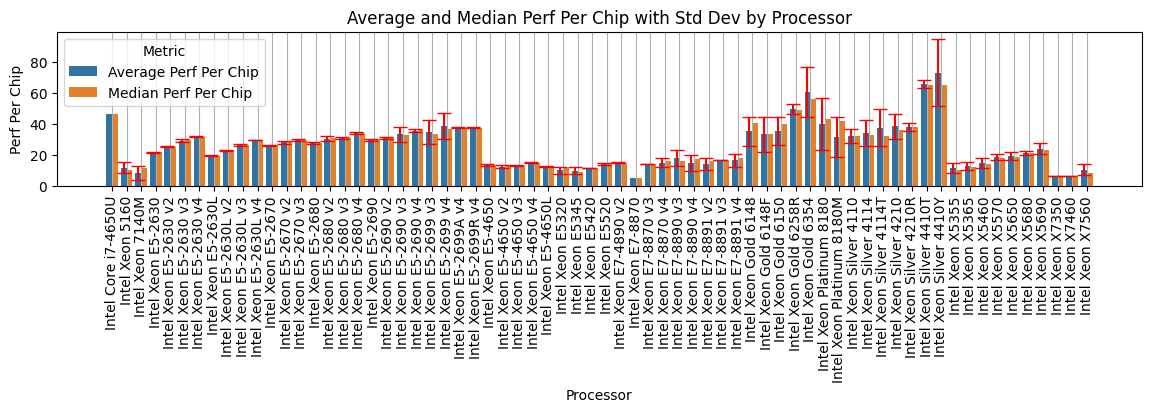

In [304]:
# Group by key_processor and aggregate the metric "perf_per_chip"
grouped = df_filtered.groupby(key_processor)['perf_per_chip'].agg(['mean', 'std', 'median']).reset_index()

# Renaming columns for better understanding
grouped.columns = ['Processor', 'Average Perf Per Chip', 'Std Dev Perf Per Chip', 'Median Perf Per Chip']

# Melting the DataFrame for easier plotting
grouped_melted = grouped.melt(id_vars=['Processor', 'Std Dev Perf Per Chip'], 
                              value_vars=['Average Perf Per Chip', 'Median Perf Per Chip'],
                              var_name='Metric', value_name='Perf Per Chip')

# Plotting using seaborn
plt.figure(figsize=(14, 2))
bar_plot = sns.barplot(x='Processor', y='Perf Per Chip', hue='Metric', data=grouped_melted, errorbar=None)
for i in range(len(grouped)):
    bar_plot.errorbar(x=i-0.2, y=grouped.iloc[i]['Average Perf Per Chip'],
                      yerr=grouped.iloc[i]['Std Dev Perf Per Chip'], fmt='none', c='red', capsize=5)

plt.xlabel('Processor')
plt.ylabel('Perf Per Chip')
plt.title('Average and Median Perf Per Chip with Std Dev by Processor')
plt.xticks(rotation=90)
plt.legend(title='Metric')
plt.grid(axis='x')  # Add this line to enable x-axis grid lines
plt.show()


In [306]:
median_spec_perf = grouped_melted[grouped_melted["Metric"].str.contains("Median")]
# print(median_spec_per)
median_spec_perf = median_spec_perf.drop(columns=["Std Dev Perf Per Chip", "Metric"])
median_spec_perf.rename(columns={"Perf Per Chip": "median_spec_int_perf"}, inplace=True)

print(median_spec_perf)
median_spec_perf.to_csv("spec_xeon_subset.csv", header=True)

# df_merged = pd.merge(df_selection, median_spec_perf, how='left', left_on='model', right_on='Processor')

# # Display the merged DataFrame
# df_merged

                 Processor  median_spec_int_perf
68     Intel Core i7-4650U                46.500
69         Intel Xeon 5160                10.475
70        Intel Xeon 7140M                11.200
71      Intel Xeon E5-2630                21.650
72   Intel Xeon E5-2630 v2                25.200
..                     ...                   ...
131       Intel Xeon X5680                20.950
132       Intel Xeon X5690                23.300
133       Intel Xeon X7350                 6.125
134       Intel Xeon X7460                 6.275
135       Intel Xeon X7560                 8.150

[68 rows x 2 columns]
